In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
w_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0,3,130)
x

array([0.        , 0.02325581, 0.04651163, 0.06976744, 0.09302326,
       0.11627907, 0.13953488, 0.1627907 , 0.18604651, 0.20930233,
       0.23255814, 0.25581395, 0.27906977, 0.30232558, 0.3255814 ,
       0.34883721, 0.37209302, 0.39534884, 0.41860465, 0.44186047,
       0.46511628, 0.48837209, 0.51162791, 0.53488372, 0.55813953,
       0.58139535, 0.60465116, 0.62790698, 0.65116279, 0.6744186 ,
       0.69767442, 0.72093023, 0.74418605, 0.76744186, 0.79069767,
       0.81395349, 0.8372093 , 0.86046512, 0.88372093, 0.90697674,
       0.93023256, 0.95348837, 0.97674419, 1.        , 1.02325581,
       1.04651163, 1.06976744, 1.09302326, 1.11627907, 1.13953488,
       1.1627907 , 1.18604651, 1.20930233, 1.23255814, 1.25581395,
       1.27906977, 1.30232558, 1.3255814 , 1.34883721, 1.37209302,
       1.39534884, 1.41860465, 1.44186047, 1.46511628, 1.48837209,
       1.51162791, 1.53488372, 1.55813953, 1.58139535, 1.60465116,
       1.62790698, 1.65116279, 1.6744186 , 1.69767442, 1.72093

In [4]:
y = w_true * x + b_true + np.random.randn(*x.shape) * 0.5
y

array([-0.33577885,  0.50980849,  0.35919693,  0.07137732,  0.20121347,
        0.82702319,  0.18374468,  0.14392404,  0.66909903,  0.77444835,
        1.6017157 ,  1.43524962,  0.62538791,  1.41704963,  1.19886901,
        0.16864943,  1.90469995,  1.87648287,  0.88208168,  1.46174269,
        0.5726611 ,  2.21803338,  0.9858398 ,  1.83964028,  2.86940678,
        1.5239128 ,  1.20758511,  1.5990877 ,  2.08471851,  2.56022959,
        1.94405424,  1.78646295,  1.37520351,  1.93319406,  3.3240857 ,
        1.62970586,  1.60646566,  1.93966691,  1.96059902,  2.43632034,
        2.33904254,  1.82539789,  2.25150313,  2.71986527,  2.46755527,
        2.30862844,  2.75472787,  2.70019199,  2.5145056 ,  3.22954896,
        3.11759417,  3.45941189,  2.84588895,  2.99394351,  4.23454145,
        2.25712041,  3.21844095,  2.95202938,  3.48383034,  3.30177902,
        3.82105391,  2.74091879,  4.01396908,  3.55031336,  3.55497865,
        3.59928721,  3.68996331,  4.12477173,  3.42081859,  3.70

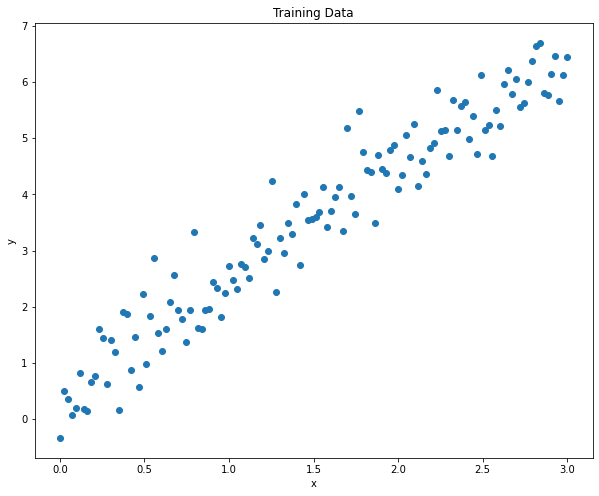

In [5]:
plt.figure(figsize=(10,8))

plt.scatter(x, y)

plt.xlabel("x")
plt.ylabel("y")

plt.title("Training Data")
plt.show()

In [6]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name = "w")
        self.bias = tf.Variable(np.random.randn(), name = "b")
 
    def __call__(self, x):
        return self.weight * x + self.bias

In [7]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [8]:
def train(linear_model, x, y, learning_rate = 0.01):
    with tf.GradientTape() as tape:
        
        y_pred = linear_model(x)

        current_loss = loss(y, y_pred)

    d_weight, d_bias = tape.gradient(current_loss,[linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(learning_rate * d_weight)
    linear_model.bias.assign_sub(learning_rate * d_bias)


In [9]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 500

learning_rate = 0.15

In [10]:
for epoch_count in range(epochs):
    
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y, linear_model(x))

    train(linear_model, x, y, learning_rate = learning_rate)

    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 1.758781909942627
Epoch count 1: Loss value: 0.4579123854637146
Epoch count 2: Loss value: 0.4086487889289856
Epoch count 3: Loss value: 0.387786865234375
Epoch count 4: Loss value: 0.3698181211948395
Epoch count 5: Loss value: 0.3539486825466156
Epoch count 6: Loss value: 0.33992481231689453
Epoch count 7: Loss value: 0.3275318741798401
Epoch count 8: Loss value: 0.3165801465511322
Epoch count 9: Loss value: 0.3069019317626953
Epoch count 10: Loss value: 0.2983492910861969
Epoch count 11: Loss value: 0.2907911539077759
Epoch count 12: Loss value: 0.2841120660305023
Epoch count 13: Loss value: 0.2782095968723297
Epoch count 14: Loss value: 0.2729935348033905
Epoch count 15: Loss value: 0.2683841288089752
Epoch count 16: Loss value: 0.264310747385025
Epoch count 17: Loss value: 0.2607109844684601
Epoch count 18: Loss value: 0.25752994418144226
Epoch count 19: Loss value: 0.25471869111061096
Epoch count 20: Loss value: 0.25223445892333984
Epoch count 21: Loss v

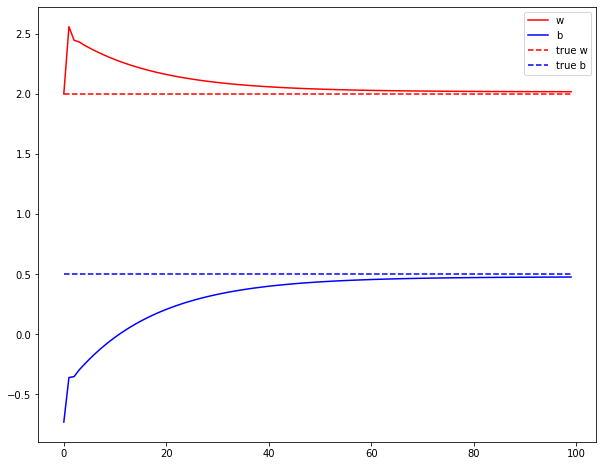

In [11]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([w_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['w','b', 'true w', 'true b'])
plt.show()

In [12]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(2.019407, 0.47738266)

In [13]:
rmse = loss(y, linear_model(x))

rmse.numpy()

0.2333574

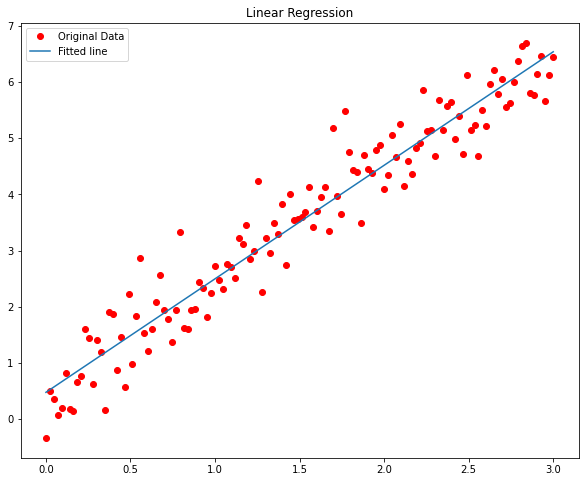

In [14]:
plt.figure(figsize=(10, 8))

plt.plot(x, y, 'ro', label= 'Original Data')
plt.plot(x, linear_model(x), label = 'Fitted line')

plt.title('Linear Regression')
plt.legend()
plt.show()